# Install Hakai Timeseries Processing Package ( Google Colab)

In [7]:
!pip install git+https://github.com/HakaiInstitute/process_ocean_timeseries.git

  Cloning https://github.com/HakaiInstitute/process_ocean_timeseries.git to c:\users\jessy\appdata\local\temp\pip-req-build-tqfk9956


  Running command git clone -q https://github.com/HakaiInstitute/process_ocean_timeseries.git 'C:\Users\jessy\AppData\Local\Temp\pip-req-build-tqfk9956'


  Created wheel for process-ocean-data: filename=process_ocean_data-0.1.0-py3-none-any.whl size=19554 sha256=8c1097be5cf14e723795fdf96b7d624b980d90da31ad777f47fe0133a16c33ce
  Stored in directory: C:\Users\jessy\AppData\Local\Temp\pip-ephem-wheel-cache-zj0xfhnx\wheels\ad\41\75\50f10ea73423e9b592c7cf28c9a4ad0ce309ceb160fca1763d
Successfully built process-ocean-data


# Import the CTD timeseries method

In [1]:
from process_ocean_data import process_ctd_timeseries
from process_ocean_data.tools import qc as qc

from ipywidgets import widgets, VBox
import xarray as xr
import numpy as np

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Retrieve Hakai Deployment Log

In [2]:
# Retrieve Hakai Instrument Deployment Log 
instrument_log = process_ctd_timeseries.get_hakai_ctd_log()
instrument_log

Retrieve Time Zone Internal Clock Sync or Start Time
Triangulate deployment location


,Project,Instrument Type,Instrument Manufacturer,Instrument Sub Type,Serial Number,Platform,Anchor Type,Scientist,BatteryIn Voltage (V),Deployment Setup,...,Latitude:Triangulation4,Longitude:Triangulation4,Range:Triangulation4,Instrument_clock_seconds_utc_offset,sub_path,file_name,Latitude:Triangulation_Results,Longitude:Triangulation_Results,Latitude,Longitude
0,Hakai Oceanography-Modeling,CTD+DO,Seabird,SBE37 SMP-ODO,21328,Taut Line Mooring,500lb Steel,Jessy Barrette; Jenn Jackson,3.67V,https://drive.google.com/drive/folders/1DkcPgM...,...,None,None,None,0.0,Calvert/DFO3/,Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21328_Cal...,51.601505,-127.531247,51.601505,-127.531247
1,Hakai Oceanography-Modeling,CTD+DO,Seabird,SBE37 SMP-ODO,21421,Taut Line Mooring,500lb Steel,Jessy Barrette; Jenn Jackson,3.67V,https://drive.google.com/drive/folders/1DkcPgM...,...,None,None,None,0.0,Calvert/DFO3/,Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21421_Cal...,51.601505,-127.531247,51.601505,-127.531247
2,Hakai Oceanography-Modeling,CTD+DO,Seabird,SBE37 SMP-ODO,21328,Taut Line Mooring,500lb Steel,Jessy Barrette; Jenn Jackson,3.67V,https://drive.google.com/drive/folders/1f3SSdl...,...,None,None,None,0.0,Calvert/DFO3/,Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21328_Cal...,51.599773,-127.528539,51.599773,-127.528539
3,Hakai Oceanography-Modeling,CTD+DO,Seabird,SBE37 SMP-ODO,21421,Taut Line Mooring,500lb Steel,Jessy Barrette; Jenn Jackson,3.67V,https://drive.google.com/drive/folders/1f3SSdl...,...,None,None,None,0.0,Calvert/DFO3/,Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21421_Cal...,51.599773,-127.528539,51.599773,-127.528539


# Download Data Locally To be Processed

In [3]:
instrument_log = process_ctd_timeseries.download_raw_data(instrument_log)

Download .\Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21328_Calvert-DFO3_20200211-20200828.cnv: : 7.40625MB [00:02,  3.45MB/s]
Download .\Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21421_Calvert-DFO3_20200211-20200828.cnv: : 7.40625MB [00:02,  3.46MB/s]


In [4]:
process_ctd_timeseries.get_ctd_qc_config()

{'depth': {'qartod': {'gross_range_test': {'suspect_span': [0, 11000],
    'fail_span': [-5, 11000]},
   'aggregate': {}}},
 'PRESPR01': {'qartod': {'gross_range_test': {'suspect_span': [0, 11000],
    'fail_span': [-5, 11000]},
   'flat_line_test': {'tolerance': 0.001,
    'suspect_threshold': 3600,
    'fail_threshold': 10800},
   'rate_of_change_test': {'threshold': 1},
   'spike_test': {'suspect_threshold': 1, 'fail_threshold': 2},
   'aggregate': {}}},
 'TEMPS901': {'qartod': {'gross_range_test': {'suspect_span': [-2, 60],
    'fail_span': [-3, 100]},
   'flat_line_test': {'tolerance': 0.001,
    'suspect_threshold': 3600,
    'fail_threshold': 10800},
   'rate_of_change_test': {'threshold': 0.01},
   'spike_test': {'suspect_threshold': 0.5, 'fail_threshold': 1},
   'aggregate': {}}},
 'CNDCST01': {'qartod': {'gross_range_test': {'suspect_span': [0, 100],
    'fail_span': [-0.1, 120]},
   'flat_line_test': {'tolerance': 0.001,
    'suspect_threshold': 10800,
    'fail_threshold': 

Read .\Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21328_Calvert-DFO3_20200211-20200828.cnv


Problems with datetime


Save to Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21328_Calvert-DFO3_20200211-20200828_L0.nc
Saving netcdf output file: .\Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21328_Calvert-DFO3_20200211-20200828_L0.nc

Variabes
scan
	long_name: Record Scan Number
	name: scan
	id: 0
	SBE_short_name: scan
	SBE_long_name: Scan Count
	span: ['1', '57721']
time
	long_name: Instrument Time
	units: seconds since 2000, Jan 01 00:00:00
	name: time
	id: 1
	SBE_short_name: timeK
	SBE_long_name: Time, Instrument [seconds]
	span: ['634684801', '652041001']
timeS
	long_name: Elapsed time since instrument start
	units: seconds
	name: timeS
	description: This output seems to have some issues and do not refect time gaps in original data. Use TimeK output as much as possible
	id: 2
	SBE_short_name: timeS
	SBE_long_name: Time, Elapsed [seconds]
	span: ['0.000', '17316000.0']
TEMPS901
	long_name: Sea Water Temperature
	standard_name: sea_water_temperature
	units: degC [ITS-90]
	name: TEMPS901
	id: 3
	SBE_short_name: tv290C
	S

Problems with datetime


Save to Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21421_Calvert-DFO3_20200211-20200828_L0.nc
Saving netcdf output file: .\Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21421_Calvert-DFO3_20200211-20200828_L0.nc

Variabes
scan
	long_name: Record Scan Number
	name: scan
	id: 0
	SBE_short_name: scan
	SBE_long_name: Scan Count
	span: ['1', '57737']
time
	long_name: Instrument Time
	units: seconds since 2000, Jan 01 00:00:00
	name: time
	id: 1
	SBE_short_name: timeK
	SBE_long_name: Time, Instrument [seconds]
	span: ['634686001', '652046101']
timeS
	long_name: Elapsed time since instrument start
	units: seconds
	name: timeS
	description: This output seems to have some issues and do not refect time gaps in original data. Use TimeK output as much as possible
	id: 2
	SBE_short_name: timeS
	SBE_long_name: Time, Elapsed [seconds]
	span: ['0.000', '17320800.0']
TEMPS901
	long_name: Sea Water Temperature
	standard_name: sea_water_temperature
	units: degC [ITS-90]
	name: TEMPS901
	id: 3
	SBE_short_name: tv290C
	S

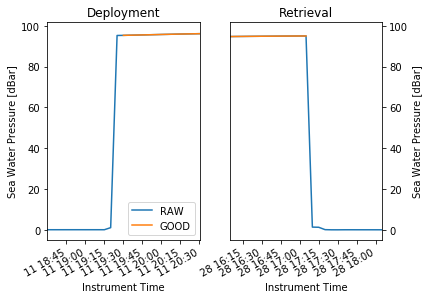

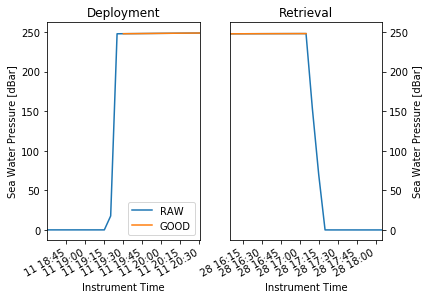

In [5]:
# Apply Standard Processing to the data
file_list = []
for index, row in instrument_log.iterrows():
    file_list +=[process_ctd_timeseries.process_data(row)]

# QAQC Processed Data

In [6]:
# Retrieve L1 files locally available
file_list = [filename for filename in os.listdir() if '_L1.' in filename]
l1_files = [item for item in file_list if item]


## Manual Review (Not compatible with Google Colab)


In [7]:
# Review one file at the time
file_selection = widgets.Select(
    options=l1_files,
    value=l1_files[0],
    description='File to review:'
)
file_selection

Select(description='File to review:', options=('Hakai_RBRsolo-SN079156_Calvert-CP1_20202012-20200529_L1.nc', '…

In [11]:
file_selection.value

'Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21421_Calvert-DFO3_20200211-20200828_L1.nc'

In [14]:
# Load Selected Dataset
ds = xr.open_dataset(file_selection.value)

# Copy qartod_aggregate as review flag
review_flag = '_qartod_aggregate'
for var in ds:
    if var.endswith(review_flag):
        attrs = ds[var].attrs
        review_var = var.replace(review_flag,'_review_flag')

        # Generate manual flag variable
        ds[review_var] = ds[var]
        ds[review_var].attrs = attrs
        ds[review_var].attrs['long_name'] = f"{attrs['ioos_qc_target']} Manual Flag"
        ds[review_var].attrs['standard_name'] = "quality_flag"
        ds[review_var].attrs['ioos_qc_test'] = "manual"

df = ds.to_dataframe()
index_names = df.index.names
df = df.reset_index()

In [15]:
# NOT COMPATIBLE WITH GOOGLE COLAB 
review_flag_suffix = "_review_flag"
qc.manual_qc_interface(df,
                       variable_list= ['TEMPS901','PSALST01', 'DOXYZZ01', 'CNDCST01'],
                       flags= 'QARTOD',
                       review_flag=review_flag_suffix
                       )

# Generate QCed files
1. Level 1a: Manually flag to a review column
1. Level 1b: Drop Bad Data 


In [16]:
# Seabird tends to have a fill value equal -9E-29. We'll replace that by np.nan
old_ds = ds.copy()
for name, value in ds.items():
    if '_FillValue' in value.encoding and 'missing_value' in value.encoding:
        value.encoding.pop('_FillValue')
for name, len in ds.dims.items():
    if '_FillValue' in ds[name].encoding and 'missing_value' in ds[name].encoding:
        ds[name].encoding.pop('_FillValue')

# Update Dataset with QCed results
for var in df.filter(like=review_flag_suffix).columns:
    temp = ds[var]
    ds[var] = (temp.dims,df[var])
    ds[var].attrs = temp.attrs

In [17]:
# Level 1 Files
# Add selected flags back in the L1 file.
for var in df.filter(like=review_flag_suffix).columns:
    associated_variable = var.replace(review_flag_suffix,'')
    ds[var] = (ds[associated_variable].dims, df[var])
    
    if 'ancillary_variable' in ds[associated_variable].attrs:
        ds[associated_variable].attrs["ancillary_variable"] += ' '+var
    else:
        ds[associated_variable].attrs["ancillary_variable"] = var
        
# Save to NetCDF
l1_review_file = file_selection.value.rsplit('.', 1)[0]+'a_review.nc'
ds.to_netcdf(l1_review_file)

In [18]:
# Generate Level 2 Flag
ds_level2 = ds.copy()
flag_to_nan = [3,4]
for var in ds:
    if var.endswith(review_flag_suffix):
        var_to_apply_flag = var.replace(review_flag_suffix,'')
        ds_level2[var_to_apply_flag] = ds_level2[var_to_apply_flag].where(~ds_level2[var].isin(flag_to_nan),np.nan)

ds_level2.to_netcdf(file_selection.value.rsplit('.', 1)[0]+'b_flagged.nc')
        

In [19]:
ds_level2

<xarray.Dataset>
Dimensions:                              (time: 57284)
Coordinates:
  * time                                 (time) datetime64[ns] 2020-02-11T19:...
Data variables: (12/49)
    instrument_model                     <U15 '37SMP-ODO-SDI12'
    instrument_type                      <U7 'CTD-ODO'
    instrument_serialnumber              <U8 '03721328'
    scan                                 (time) float64 133.0 ... 5.742e+04
    timeS                                (time) timedelta64[ns] 11:00:00 ... ...
    TEMPS901                             (time) float64 8.399 8.4 ... 7.783
    ...                                   ...
    depth_review_flag                    (time) int8 1 1 1 1 1 1 ... 1 1 1 1 1 1
    PRESPR01_review_flag                 (time) int8 1 1 1 1 1 1 ... 1 1 1 1 1 1
    TEMPS901_review_flag                 (time) int8 1 1 1 1 1 1 ... 1 1 1 1 1 1
    CNDCST01_review_flag                 (time) int8 1 1 1 1 1 1 ... 1 1 1 1 1 1
    PSALST01_review_flag                 (time) int8 1 1 1 1 1 1 ... 1 1 1 1 1 1
    DOXYZZ01_review_flag                 (time) int8 4 4 4 4 1 1 ... 1 1 1 1 1 1
Attributes: (12/19)
    history:               2020-08-29T12:38:51 datcnv_date = Aug 29 2020 12:3...
    DATE_CREATION:         20210922145408
    FirmwareVersion:       6.2.0
    bad_flag:              -9.990e-29
    date_created:          2020-08-29T12:30:11
    date_modified:         2021-09-22T21:54:01.004016
    ...                    ...
    nvalues:               57721
    original_header:       * Sea-Bird SBE37SMP-ODO-SDI12  Data File:\n* FileN...
    original_header_json:  {\n  "instrument_header": {\n    "FileName": "C:\\...
    sbe_model:             37SMP-ODO-SDI12
    serial_number:         03721328
    start_time:            Feb 10 2020 21:20:01 [Instrument's time stamp, fir...